In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylorentz import Momentum4
import itertools
from iminuit import cost, Minuit
from probfit.pdf import doublecrystalball
from matplotlib import pyplot as plt
from scipy.stats import expon
top_mass = 173000


In [91]:
#signal
lumi_signal=36.1
sigma_signal=832.*1000
AE_signal=0.0289
BR_tsig = 0.002
BR_yy = 0.0023
BR_had = 0.676

In [92]:
lumi_bkgd=36.1
sigma_bkgd=51.8*1000 
AE_bkgd=0.003656  

bkgd_expected = lumi_bkgd * sigma_bkgd *AE_bkgd
bkgd_expected


6836.64688

In [93]:
signal_expected = 2*lumi_signal*sigma_signal*AE_signal*BR_tsig*BR_yy*BR_had
signal_expected

5.398373067775999

In [94]:
signal = pd.read_csv('signal_cat.csv')
bkgd = pd.read_csv('background_cat.csv')

In [95]:
signal_cat1 = signal[signal["category"] == 1]
bkgd_cat1 = bkgd[bkgd["category"] == 1]

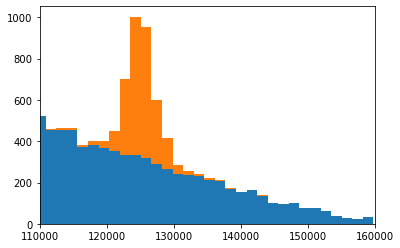

In [96]:
plt.hist([bkgd_cat1["myy"], signal_cat1["myy"]], bins = 100, stacked= True)
plt.xlim(110000, 160000)
plt.show()

In [97]:
signal_cat2 = signal[signal["category"] == 2]
bkgd_cat2 = bkgd[bkgd["category"] == 2]

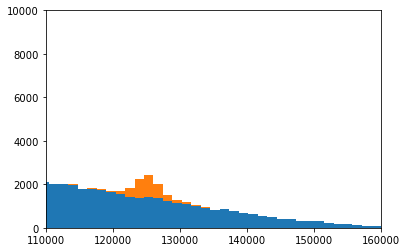

In [98]:
plt.hist([bkgd_cat2["myy"], signal_cat2["myy"]], bins = 100, stacked= True)
plt.xlim(110000, 160000)
plt.ylim(0, 10000)
plt.show()

In [99]:
signal_cat2["myy"]

2       120783.227350
3       127139.459744
4       121199.731172
9       128882.686874
12      127718.991478
            ...      
8858    145853.862914
8860    130164.056802
8861    125632.102737
8863    127680.555160
8865    124968.112759
Name: myy, Length: 3901, dtype: float64

In [100]:
def crystalball(x, alpha, n, x_m, sigma, scale):
    output = []
    
    a = np.abs(alpha)
    for i in x:
        num = (i-x_m)/n
        if (num > (-alpha)):
            out = scale*np.exp(-((i-x_m)**2)/((sigma**2)*2))

        else:
            out = scale*((n/a)**n)*np.exp(-(alpha**2)/2)*((n/a)-a-(i-x_m)/sigma)**(-n)

        output.append(out)
    

    return output


In [101]:
c = cost.UnbinnedNLL(np.array(signal_cat2["myy"]), doublecrystalball)

TypeError: doublecrystalball() takes exactly 7 positional arguments (0 given)

In [113]:
m = m_init(c)
m.migrad()

TypeError: only size-1 arrays can be converted to Python scalars

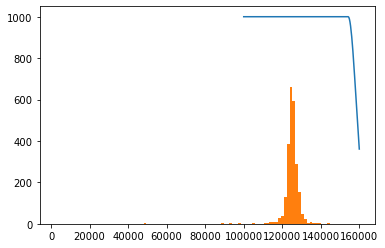

In [ ]:
xm = np.linspace(100000, 160000, num = 200)
plt.plot(xm, crystalball(xm, *mi.values))
plt.hist( signal_cat1["myy"], bins = 100)
plt.show()